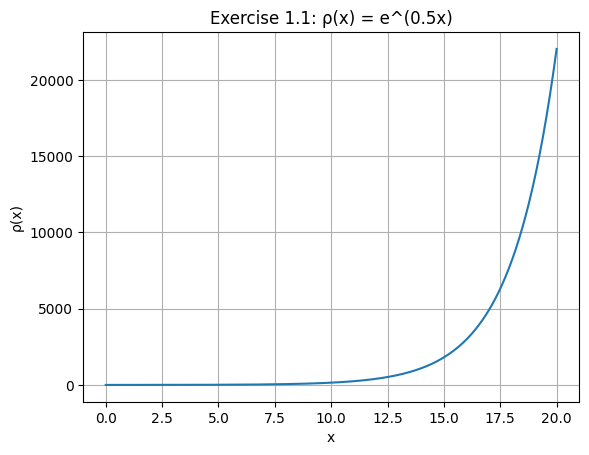

True mass = 44050.931589613436
n | Trapezoid | Error | Simpson | Error
10 | 47662.081896 | 3611.150306 | 44269.300016 | 218.368426
20 | 44964.858085 | 913.926496 | 44065.783482 | 14.851892
40 | 44280.124888 | 229.193299 | 44051.880490 | 0.948900
80 | 44108.274642 | 57.343052 | 44050.991227 | 0.059637


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def composite_trapezoid(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def composite_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return (h/3) * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum())

# 1.1
# ρ(x) = e^(0.5x), 0 ≤ x ≤ 20
rho = lambda x: np.exp(0.5*x)
a, b = 0, 20
true_value = 2*(math.exp(10) - 1)

x_plot = np.linspace(a, b, 400)
plt.plot(x_plot, rho(x_plot))
plt.title("Exercise 1.1: ρ(x) = e^(0.5x)")
plt.xlabel("x")
plt.ylabel("ρ(x)")
plt.grid(True)
plt.show()

n_values = [10, 20, 40, 80]

print("True mass =", true_value)
print("n | Trapezoid | Error | Simpson | Error")

for n in n_values:
    trap = composite_trapezoid(rho, a, b, n)
    simp = composite_simpson(rho, a, b, n)
    print(f"{n:2d} | {trap:.6f} | {abs(trap-true_value):.6f} | {simp:.6f} | {abs(simp-true_value):.6f}")

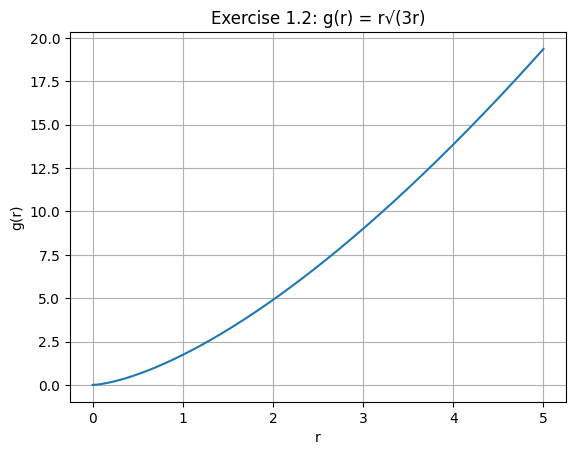

True mass = 243.3467205584167
n | Trapezoid | Error | Simpson | Error
10 | 244.058182 | 0.711461 | 243.373672 | 0.026952
20 | 243.528170 | 0.181449 | 243.351499 | 0.004779
40 | 243.392717 | 0.045997 | 243.347566 | 0.000846
80 | 243.358332 | 0.011611 | 243.346870 | 0.000150


In [2]:
def composite_trapezoid(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def composite_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return (h/3) * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum())

# 1.2
R = 5
g = lambda r: np.sqrt(3*r) * r
true_value = 20*math.pi*math.sqrt(15)

r_plot = np.linspace(0, R, 400)
plt.plot(r_plot, g(r_plot))
plt.title("Exercise 1.2: g(r) = r√(3r)")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)
plt.show()

n_values = [10, 20, 40, 80]

print("True mass =", true_value)
print("n | Trapezoid | Error | Simpson | Error")

for n in n_values:
    trap = composite_trapezoid(g, 0, R, n)
    simp = composite_simpson(g, 0, R, n)
    mass_trap = 2*math.pi*trap
    mass_simp = 2*math.pi*simp
    print(f"{n:2d} | {mass_trap:.6f} | {abs(mass_trap-true_value):.6f} | {mass_simp:.6f} | {abs(mass_simp-true_value):.6f}")